<a href="https://colab.research.google.com/github/mervegb/stock-market-analysis-lstm/blob/main/stock_market_analysis_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook uses yfinance to get stock information and visualize different aspects of it using Seaborn and Matplotlib

We'll look into few ways of analyzing the risk of a stock based on its previous performance history

We'll also be predicting future stock prices through a Long Short Term Memory (LSTM) method

In [2]:
!pip install -q yfinance

**1) What was the change in price of the stock over time?**

In [1]:
import yfinance as yf
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# Define start and end dates
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

tickers = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
company_names = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for ticker in tickers:
    globals()[ticker] = yf.download(ticker, start, end)

company_list = [AAPL, GOOG, MSFT, AMZN]

for company, company_name in zip(company_list, company_names):
    company["company_name"] = company_name

df = pd.concat(company_list, axis=0)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
#Get Descriptive Statistics
AAPL.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,200.194496,200.750949,202.413794,198.921067,200.647193,5.744695e+07
std,21.641233,21.473148,21.682886,21.109912,21.459579,3.043468e+07
min,164.405121,165.000000,166.399994,164.080002,165.350006,7.107446e+06
25%,183.486069,184.250000,185.149994,182.229996,183.919998,4.220160e+07
50%,193.223404,194.029999,195.320007,192.970001,194.199997,5.075950e+07
75%,222.525177,222.770004,225.350006,221.190002,223.919998,6.351640e+07
max,236.220108,236.479996,237.490005,234.449997,236.479996,3.186799e+08


In [4]:
#Information about DataFrame
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2023-11-13 00:00:00+00:00 to 2024-11-13 00:00:00+00:00
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  253 non-null    float64
 1   (Close, AAPL)      253 non-null    float64
 2   (High, AAPL)       253 non-null    float64
 3   (Low, AAPL)        253 non-null    float64
 4   (Open, AAPL)       253 non-null    float64
 5   (Volume, AAPL)     253 non-null    int64  
 6   (company_name, )   253 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


**Closing Price**

Closing price is the last price at which the stock is traded during regular trading day

Stock's closing price is the standard benchmark used by investors to track its performance over time

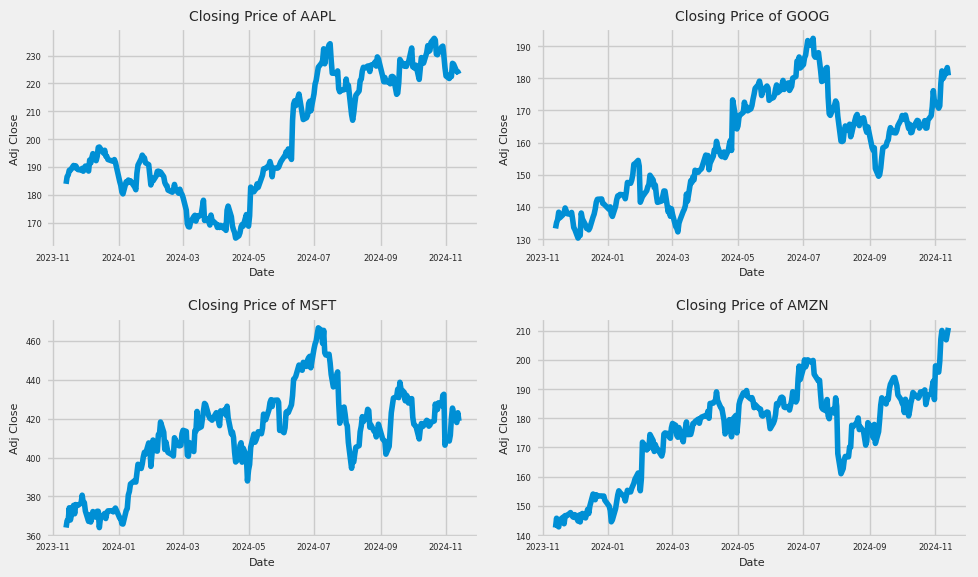

In [20]:
# Create a 2x2 subplot grid with smaller figure size
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))

# Loop through each company and plot
for i, (company, ticker) in enumerate(zip(company_list, tickers)):
    row, col = divmod(i, 2)  # Calculate row and column index
    axes[row, col].plot(company["Adj Close"])
    axes[row, col].set_title(f"Closing Price of {ticker}", fontsize=10)
    axes[row, col].set_ylabel("Adj Close", fontsize=8)
    axes[row, col].set_xlabel("Date", fontsize=8)

    # Reduce tick label size
    axes[row, col].tick_params(axis='both', which='major', labelsize=6)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

**Volume of Sales**

Volume refers to the number of shares or contracts that are bought and sold during specific period.

Trading Volume tells us how active a stock or asset is in the market.

If a stock has high trading volume, it means there are buyers and sellers interested in it. This makes it easier to buy or sell the stock without waiting. Low trading volume means fewer people are interested, so it might be harder to find someone to buy from or sell to.


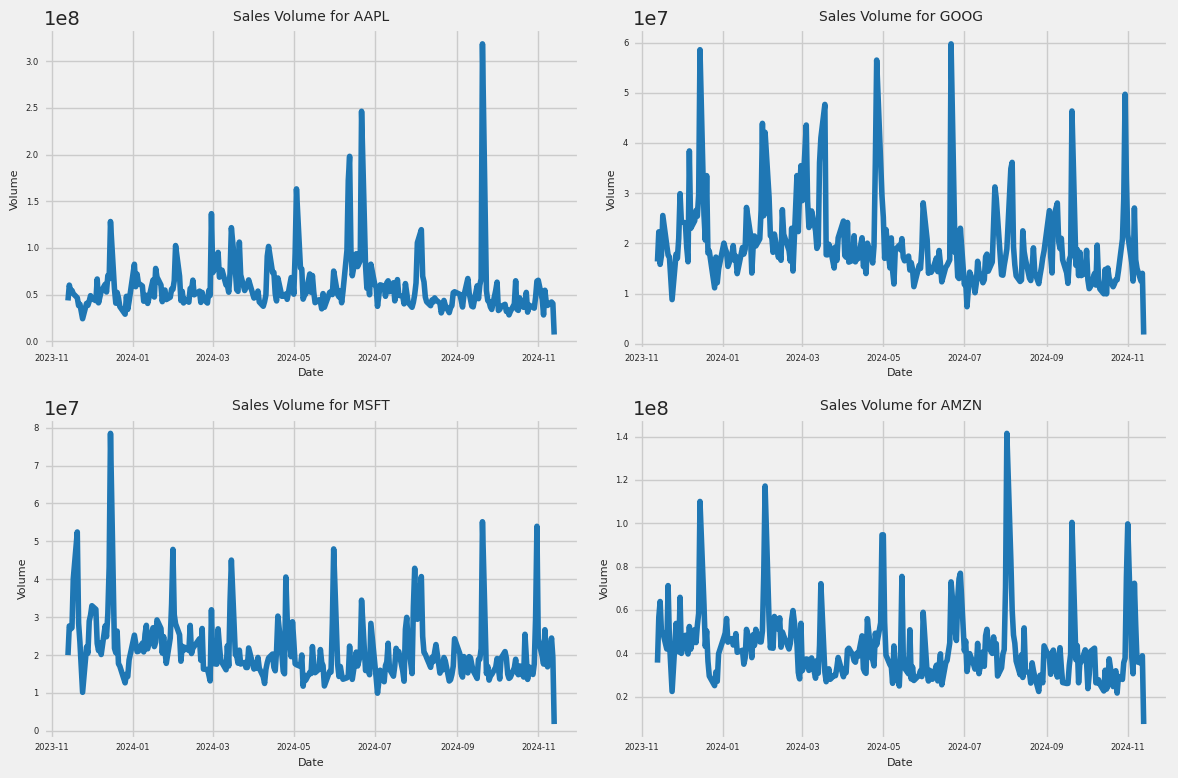

In [22]:
# Let's plot the total volume of stock being traded each day

# Create a 2x2 subplot grid with a smaller figure size
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Loop through each company and plot Volume for each company
for i, (company, ticker) in enumerate(zip(company_list, tickers)):
    row, col = divmod(i, 2)  # Calculate row and column index for 2x2 grid
    axes[row, col].plot(company["Volume"], color="tab:blue")
    axes[row, col].set_title(f"Sales Volume for {ticker}", fontsize=10)
    axes[row, col].set_ylabel("Volume", fontsize=8)
    axes[row, col].set_xlabel("Date", fontsize=8)

    # Reduce tick label size for both axes
    axes[row, col].tick_params(axis='both', which='major', labelsize=6)

# Use tight layout to ensure spacing between subplots
plt.tight_layout()
plt.show()